## P(k) and XP(k) comparison with Disco-DJ

In [1]:
import os
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "true"
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "0.95"

import jax
import jax.numpy as jnp
import BFast
from BFast.core.jax_utils import show_hlo_info
from discodj import DiscoDJ
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# enable 64-bit
precision = "double"
if precision == "double":
    jax.config.update("jax_enable_x64", True)

In [3]:
dim = 3
res = 512
boxsize = 1000.

In [4]:
bins = jnp.arange(1, res//3, 3)
nbins = bins.shape[0] - 1
print(nbins)

56


## Power spectrum and cross-spectrum comparison with DJ

In [5]:
bins_Pk = jnp.arange(1, res//2, 3)
nbins_Pk = bins_Pk.shape[0] - 1
f1 = jax.random.normal(jax.random.PRNGKey(1000), (res,) * dim)
f2 = jax.random.normal(jax.random.PRNGKey(2000), (res,) * dim)

In [6]:
pk_out = BFast.Pk(f1, boxsize=boxsize, bin_edges=bins_Pk, mas_order=0, jit=True)
k, Pk0 = pk_out["k"], pk_out["Pk0"]

In [7]:
%%timeit
pk_out = BFast.Pk(f1, boxsize=boxsize, bin_edges=bins_Pk, mas_order=0, jit=True)

247 ms ± 16.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
dj = DiscoDJ(dim=3, res=res, precision=precision, boxsize=boxsize)
k_dj, Pk_dj, _ = dj.evaluate_power_spectrum(f1, bins=tuple((2*bins_Pk/dj.res * dj.k_nyquist).tolist()), compute_keff=True, try_to_jit=True)

In [9]:
%%timeit
k_dj, Pk_dj, _ = dj.evaluate_power_spectrum(f1, bins=tuple((2*bins_Pk/dj.res * dj.k_nyquist).tolist()), compute_keff=True, try_to_jit=True)

249 ms ± 7.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
print(Pk_dj)

[7.21290893 7.32431017 7.26819683 7.55380541 7.39620116 7.45803619
 7.5022929  7.33236873 7.41747089 7.33619176 7.40303327 7.42791473
 7.47747526 7.53468115 7.51467488 7.44180525 7.45483177 7.42548191
 7.4492116  7.48207854 7.44021902 7.40812633 7.42246103 7.50025983
 7.43419676 7.45655086 7.43579393 7.44027437 7.41620641 7.42051195
 7.44172141 7.44752618 7.44817483 7.44001706 7.46418211 7.46045904
 7.42342558 7.44678385 7.44626973 7.48166028 7.47197972 7.42068706
 7.44564447 7.44798878 7.47149904 7.44648193 7.46068127 7.44361092
 7.4416002  7.46295314 7.45820584 7.44702817 7.44987584 7.45170514
 7.42733915 7.44784412 7.42985001 7.42322821 7.45846629 7.44086113
 7.44948533 7.45993113 7.45577557 7.44646828 7.43833821 7.45944983
 7.45237515 7.44329715 7.44544087 7.45172356 7.46726509 7.44457001
 7.45353896 7.45991016 7.45542479 7.44474565 7.4518631  7.45603099
 7.43693455 7.44101859 7.45139495 7.44455308 7.44689817 7.45493432]


In [11]:
print(dj.k_nyquist)
print(bins_Pk.max())
print(k)
print(k_dj)

253
[0.01846152 0.03556799 0.05408945 0.07277579 0.09151478 0.11027571
 0.1290346  0.14781193 0.16672063 0.18552058 0.20432467 0.22321432
 0.24203687 0.26085162 0.27971134 0.29855065 0.31740243 0.33623559
 0.35503698 0.37391282 0.3928089  0.41162858 0.43045208 0.44929057
 0.46815826 0.48701779 0.50583036 0.52467097 0.54354225 0.56241089
 0.58125274 0.60007211 0.61891754 0.63777664 0.65662735 0.6754672
 0.69431754 0.71318365 0.73203963 0.75087944 0.7697274  0.78856122
 0.80740097 0.82627157 0.84511806 0.86396207 0.88280979 0.90165
 0.92050999 0.9393623  0.95821559 0.97706123 0.99589875 1.01475963
 1.03361635 1.05245023 1.07129755 1.0901597  1.10899369 1.12784275
 1.14671185 1.16555857 1.18440089 1.20324131 1.22209443 1.24094788
 1.25979207 1.27863924 1.29748978 1.31634384 1.33520132 1.35405144
 1.37288652 1.39173279 1.41059177 1.42944362 1.44828905 1.46713933
 1.48598517 1.5048275  1.52368429 1.54253686 1.5613794  1.58023048]
[0.01846152 0.03573095 0.05417025 0.07277579 0.09151478 0.110

In [12]:
print((k - k_dj) / k)

[ 3.75857029e-16 -4.58145324e-03 -1.49379355e-03 -1.18229275e-14
  3.94277839e-15 -7.84016068e-04 -5.49824490e-04 -1.87752406e-05
 -4.53138507e-05 -1.67348396e-04 -1.00346397e-04 -6.09290311e-15
 -3.30263972e-14 -3.96911785e-05 -5.40988693e-05 -2.98746315e-05
 -9.94956232e-06 -7.84178602e-05 -6.75238170e-05 -2.24164325e-05
 -1.97498277e-05 -3.57372055e-14 -1.76741501e-05 -3.31680146e-05
 -2.58937782e-05 -2.58256783e-05 -1.51797612e-05 -4.11106291e-07
 -3.66121281e-07 -1.56419119e-05 -1.40808609e-05 -7.57514174e-06
 -6.91898507e-06 -1.53868475e-05 -1.58752524e-05 -5.06354120e-06
 -3.89328221e-06 -1.46793662e-06 -7.95950905e-06 -7.82579459e-06
 -2.89268108e-06 -2.38473154e-06 -5.19764557e-06 -1.41729094e-05
 -9.29963017e-06 -1.24084503e-05 -1.21823242e-05 -7.18089400e-06
 -6.36143378e-06 -1.97329090e-06 -7.82416237e-06 -8.95677005e-06
 -3.10119414e-06 -2.25959430e-07 -2.15192901e-07 -6.76910323e-06
 -7.00256876e-06 -2.37315093e-06 -4.86749807e-06 -3.85087663e-06
 -1.15292883e-06 -4.49689

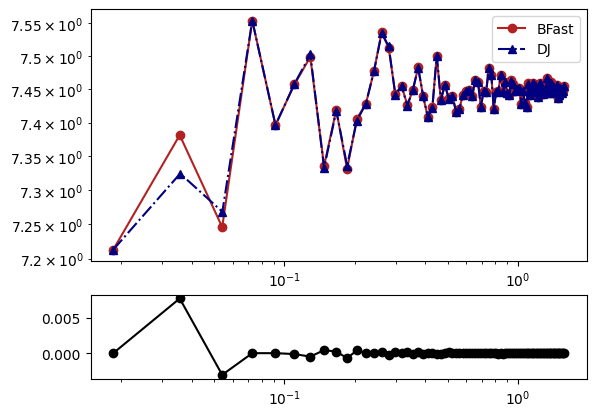

In [13]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]})
axs[0].loglog(k, Pk0, "-", marker="o", color="firebrick", label="BFast")
axs[0].loglog(k_dj, Pk_dj, "-.", marker="^", color="navy", label="DJ")
axs[0].legend()
axs[1].semilogx(k, Pk0 / Pk_dj - 1.0, "k-", marker="o", label="Relative Deviation")


In [14]:
jnp.abs(Pk0 / Pk_dj - 1.0).max()

Array(0.00778986, dtype=float64)

In [15]:
xpk_out = BFast.Pk_cross(f1, f2, boxsize=boxsize, bin_edges=bins_Pk, jit=True)
k_xy, Pxy0, r = xpk_out["k"], xpk_out["Pxy0"], xpk_out["r"]

In [16]:
k_dx_dj, r_dj, Px0_dj, Py0_dj = dj.evaluate_cross_power_spectrum(f1, f2, tuple((2*bins_Pk/dj.res * dj.k_nyquist).tolist()), deconvolve=False, try_to_jit=True)

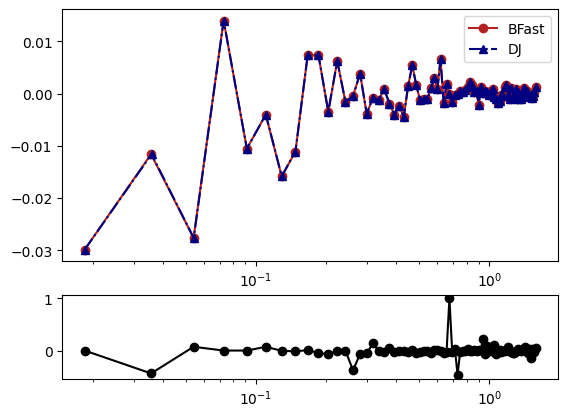

In [17]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]})
axs[0].semilogx(k_xy, r_dj, "-", marker="o", color="firebrick", label="BFast")
axs[0].semilogx(k_dx_dj, r_dj, "-.", marker="^", color="navy", label="DJ")
axs[0].legend()
axs[1].semilogx(k_xy, r / r_dj - 1.0, "k-", marker="o", label="Relative Deviation")


In [18]:
jnp.abs(r - r_dj).max()

Array(0.00506055, dtype=float64)

In [19]:
Pxy0.dtype

dtype('float64')

In [20]:
Px0_dj.dtype

dtype('float64')